In [28]:
!pip install --upgrade pip
!pip install pandas numpy requests beautifulsoup4 textblob matplotlib scikit-learn

In [29]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import datetime
import time
import random
import os

In [30]:
top_10_coins = {
    "bitcoin": "BTCUSDT",
    "ethereum": "ETHUSDT",
    "binancecoin": "BNBUSDT",
    "ripple": "XRPUSDT",
    "cardano": "ADAUSDT",
    "solana": "SOLUSDT",
    "dogecoin": "DOGEUSDT",
    "tether": "USDTUSDT",  # Tether не имеет пары с USDT, пропустим
    "toncoin": "TONUSDT",
    "shiba-inu": "SHIBUSDT"
}

In [4]:
top_10_coins.pop("tether")

'USDTUSDT'

In [5]:
print("Топ-10 криптовалют (с парами для Binance):", top_10_coins)

Топ-10 криптовалют (с парами для Binance): {'bitcoin': 'BTCUSDT', 'ethereum': 'ETHUSDT', 'binancecoin': 'BNBUSDT', 'ripple': 'XRPUSDT', 'cardano': 'ADAUSDT', 'solana': 'SOLUSDT', 'dogecoin': 'DOGEUSDT', 'toncoin': 'TONUSDT', 'shiba-inu': 'SHIBUSDT'}


In [31]:
def fetch_price_data(symbol, start_date, end_date):
    try:
        # Преобразуем даты в миллисекунды
        start_ts = int(start_date.timestamp() * 1000)
        end_ts = int(end_date.timestamp() * 1000)
        
        # URL для Binance API (klines - исторические данные)
        url = "https://api.binance.com/api/v3/klines"
        params = {
            "symbol": symbol,
            "interval": "1d",  # Дневной интервал
            "startTime": start_ts,
            "endTime": end_ts,
            "limit": 1000  # Максимум 1000 записей за запрос
        }
        
        # Делаем запрос
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        
        # Преобразуем в DataFrame
        prices = pd.DataFrame(data, columns=[
            "timestamp", "open", "high", "low", "close", "volume",
            "close_time", "quote_asset_volume", "number_of_trades",
            "taker_buy_base", "taker_buy_quote", "ignore"
        ])
        
        # Берем только дату и цену закрытия
        prices["date"] = pd.to_datetime(prices["timestamp"], unit="ms")
        prices["price"] = prices["close"].astype(float)
        return prices[["date", "price"]]
    except Exception as e:
        print(f"Ошибка при сборе данных для {symbol}: {e}")
        return None

# Устанавливаем даты
start = pd.Timestamp("2023-01-01")
end = pd.Timestamp("2024-12-31")

# Собираем данные для всех монет
all_prices = {}
for coin, symbol in top_10_coins.items():
    prices = fetch_price_data(symbol, start, end)
    if prices is not None:
        all_prices[coin] = prices
        prices.to_csv(f"{coin}_prices.csv", index=False)
        print(f"Собраны цены для {coin} ({len(prices)} записей)")
    else:
        print(f"Не удалось собрать данные для {coin}")
    time.sleep(1)  # Задержка 1 секунда, чтобы не превысить лимит

# Проверяем данные для Bitcoin
print("Первые 5 записей для Bitcoin:")
print(all_prices["bitcoin"].head())

Собраны цены для bitcoin (731 записей)
Собраны цены для ethereum (731 записей)
Собраны цены для binancecoin (731 записей)
Собраны цены для ripple (731 записей)
Собраны цены для cardano (731 записей)
Собраны цены для solana (731 записей)
Собраны цены для dogecoin (731 записей)
Ошибка при сборе данных для USDTUSDT: 400 Client Error: Bad Request for url: https://api.binance.com/api/v3/klines?symbol=USDTUSDT&interval=1d&startTime=1672531200000&endTime=1735603200000&limit=1000
Не удалось собрать данные для tether
Собраны цены для toncoin (146 записей)
Собраны цены для shiba-inu (731 записей)
Первые 5 записей для Bitcoin:
        date     price
0 2023-01-01  16616.75
1 2023-01-02  16672.87
2 2023-01-03  16675.18
3 2023-01-04  16850.36
4 2023-01-05  16831.85


In [32]:
news_placeholder = {
    "bitcoin": ["Bitcoin hits new all-time high", "BTC price surges", "Bitcoin ETF approved"],
    "ethereum": ["Ethereum upgrades network", "ETH price rises", "Ethereum 2.0 news"],
    "binancecoin": ["Binance launches new feature", "BNB price update", "Binance news"],
    "ripple": ["Ripple wins lawsuit", "XRP price jumps", "Ripple partners with bank"],
    "cardano": ["Cardano releases update", "ADA price prediction", "Cardano news"],
    "solana": ["Solana network outage", "SOL price drops", "Solana updates"],
    "dogecoin": ["Dogecoin spikes after tweet", "DOGE price news", "Dogecoin update"],
    "toncoin": ["Toncoin gains popularity", "TON price rises", "Toncoin news"],
    "shiba-inu": ["Shiba Inu burns tokens", "SHIB price surges", "Shiba Inu news"]
}

# Устанавливаем даты
start = pd.Timestamp("2023-01-01")
end = pd.Timestamp("2024-12-31")

# Создаем DataFrame для новостей
all_news = {}
for coin in top_10_coins.keys():  # Используем top_10_coins, чтобы исключить tether
    news = news_placeholder.get(coin, ["No news available"])
    news_df = pd.DataFrame({
        "date": pd.date_range(start, end, periods=len(news)),
        "title": news
    })
    all_news[coin] = news_df
    news_df.to_csv(f"{coin}_news.csv", index=False)
    print(f"Добавлены placeholder новости для {coin} ({len(news)} заголовков)")

# Проверяем новости для Bitcoin
print("Первые 5 новостей для Bitcoin:")
print(all_news["bitcoin"].head())

Добавлены placeholder новости для bitcoin (3 заголовков)
Добавлены placeholder новости для ethereum (3 заголовков)
Добавлены placeholder новости для binancecoin (3 заголовков)
Добавлены placeholder новости для ripple (3 заголовков)
Добавлены placeholder новости для cardano (3 заголовков)
Добавлены placeholder новости для solana (3 заголовков)
Добавлены placeholder новости для dogecoin (3 заголовков)
Добавлены placeholder новости для tether (1 заголовков)
Добавлены placeholder новости для toncoin (3 заголовков)
Добавлены placeholder новости для shiba-inu (3 заголовков)
Первые 5 новостей для Bitcoin:
        date                           title
0 2023-01-01  Bitcoin hits new all-time high
1 2024-01-01                BTC price surges
2 2024-12-31            Bitcoin ETF approved


In [33]:
cleaned_data = {}

# Обрабатываем каждую монету
for coin in top_10_coins.keys():
    # Проверяем наличие файлов
    price_file = f"{coin}_prices.csv"
    news_file = f"{coin}_news.csv"
    
    if not os.path.exists(price_file):
        print(f"Файл {price_file} не найден. Убедитесь, что ячейка 3 выполнена корректно.")
        continue
    if not os.path.exists(news_file):
        print(f"Файл {news_file} не найден. Убедитесь, что ячейка 4 выполнена корректно.")
        continue
    
    # Загружаем данные
    prices = pd.read_csv(price_file)
    news = pd.read_csv(news_file)
    
    # Преобразуем даты
    prices["date"] = pd.to_datetime(prices["date"])
    news["date"] = pd.to_datetime(news["date"])
    
    # Очистка цен: заполняем пропуски и убираем отрицательные значения
    prices["price"] = prices["price"].ffill().clip(lower=0)
    
    # Объединяем данные по дате
    combined = pd.merge(prices, news, on="date", how="left")
    combined["title"] = combined["title"].fillna("No news")
    
    # Сохраняем результат
    cleaned_data[coin] = combined
    combined.to_csv(f"{coin}_cleaned.csv", index=False)
    print(f"Очищены данные для {coin} ({len(combined)} записей)")

# Проверяем результат для Bitcoin
if "bitcoin" in cleaned_data:
    print("Первые 5 записей для Bitcoin после очистки:")
    print(cleaned_data["bitcoin"].head())
else:
    print("Данные для Bitcoin не были очищены. Проверьте предыдущие шаги.")

Очищены данные для bitcoin (731 записей)
Очищены данные для ethereum (731 записей)
Очищены данные для binancecoin (731 записей)
Очищены данные для ripple (731 записей)
Очищены данные для cardano (731 записей)
Очищены данные для solana (731 записей)
Очищены данные для dogecoin (731 записей)
Файл tether_prices.csv не найден. Убедитесь, что ячейка 3 выполнена корректно.
Очищены данные для toncoin (146 записей)
Очищены данные для shiba-inu (731 записей)
Первые 5 записей для Bitcoin после очистки:
        date     price                           title
0 2023-01-01  16616.75  Bitcoin hits new all-time high
1 2023-01-02  16672.87                         No news
2 2023-01-03  16675.18                         No news
3 2023-01-04  16850.36                         No news
4 2023-01-05  16831.85                         No news


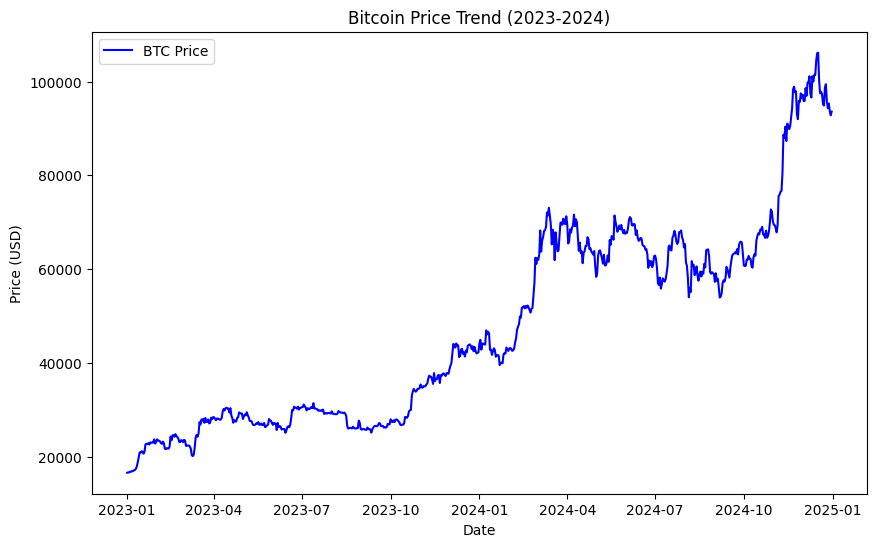

Статистика цен Bitcoin:
count       731.000000
mean      47431.978003
std       21678.139323
min       16616.750000
25%       27757.485000
50%       42708.700000
75%       64150.285000
max      106133.740000
Name: price, dtype: float64


In [34]:
if "bitcoin" not in cleaned_data:
    print("Данные для Bitcoin отсутствуют. Убедитесь, что предыдущие ячейки выполнены корректно.")
else:
    # Выбираем данные для Bitcoin
    btc_data = cleaned_data["bitcoin"]

    # Строим график цен
    plt.figure(figsize=(10, 6))
    plt.plot(btc_data["date"], btc_data["price"], label="BTC Price", color="blue")
    plt.title("Bitcoin Price Trend (2023-2024)")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.savefig("btc_price_trend.png")
    plt.show()

    # Выводим статистику
    print("Статистика цен Bitcoin:")
    print(btc_data["price"].describe())

In [35]:
def get_sentiment(title):
    analysis = TextBlob(title)
    return analysis.sentiment.polarity

# Применяем к каждой монете
for coin in cleaned_data.keys():  # Используем cleaned_data.keys(), чтобы избежать KeyError
    cleaned_data[coin]["sentiment"] = cleaned_data[coin]["title"].apply(get_sentiment)
    cleaned_data[coin].to_csv(f"{coin}_cleaned.csv", index=False)

# Проверяем результат для Bitcoin
if "bitcoin" in cleaned_data:
    print("Первые 5 записей с sentiment для Bitcoin:")
    print(cleaned_data["bitcoin"][["title", "sentiment"]].head())
else:
    print("Данные для Bitcoin отсутствуют. Проверьте предыдущие шаги.")

Первые 5 записей с sentiment для Bitcoin:
                            title  sentiment
0  Bitcoin hits new all-time high   0.148182
1                         No news   0.000000
2                         No news   0.000000
3                         No news   0.000000
4                         No news   0.000000


In [36]:
if "bitcoin" not in cleaned_data:
    print("Данные для Bitcoin отсутствуют. Убедитесь, что предыдущие ячейки выполнены корректно.")
else:
    # Выбираем данные для Bitcoin
    btc_data = cleaned_data["bitcoin"]

    # Создаем признаки: индекс времени
    X = np.arange(len(btc_data)).reshape(-1, 1)
    y = btc_data["price"].values

    # Делим на тренировочные и тестовые данные
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Проверяем размеры
    print("Размер тренировочного набора:", X_train.shape)
    print("Размер тестового набора:", X_test.shape)

Размер тренировочного набора: (584, 1)
Размер тестового набора: (147, 1)


In [37]:
if "bitcoin" not in cleaned_data:
    print("Данные для Bitcoin отсутствуют. Убедитесь, что предыдущие ячейки выполнены корректно.")
else:
    # Создаем и обучаем модель
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Делаем предсказания на тестовом наборе
    predictions = model.predict(X_test)

    # Выводим первые 5 предсказаний
    print("Первые 5 предсказаний:", predictions[:5])
    print("Реальные значения:", y_test[:5])

Первые 5 предсказаний: [67225.64614447 67316.82342733 67408.00071019 67499.17799305
 67590.35527592]
Реальные значения: [55134.16 61685.99 60837.99 60923.51 58712.59]


In [38]:
if "bitcoin" not in cleaned_data:
    print("Данные для Bitcoin отсутствуют. Убедитесь, что предыдущие ячейки выполнены корректно.")
else:
    # Создаем индексы для 2025 года
    last_index = len(btc_data) - 1
    future_indices = np.arange(last_index + 1, last_index + 366).reshape(-1, 1)

    # Делаем прогноз
    forecast = model.predict(future_indices)

    # Создаем даты для 2025 года
    dates_2025 = pd.date_range("2025-01-01", periods=365)

    # Сохраняем прогноз
    btc_forecast = pd.DataFrame({"date": dates_2025, "predicted_price": forecast})
    btc_forecast.to_csv("btc_2025_predictions.csv", index=False)

    # Проверяем первые 5 предсказаний
    print("Первые 5 предсказаний на 2025 год:")
    print(btc_forecast["predicted_price"].head())

Первые 5 предсказаний на 2025 год:
0    80628.706725
1    80719.884008
2    80811.061291
3    80902.238574
4    80993.415857
Name: predicted_price, dtype: float64


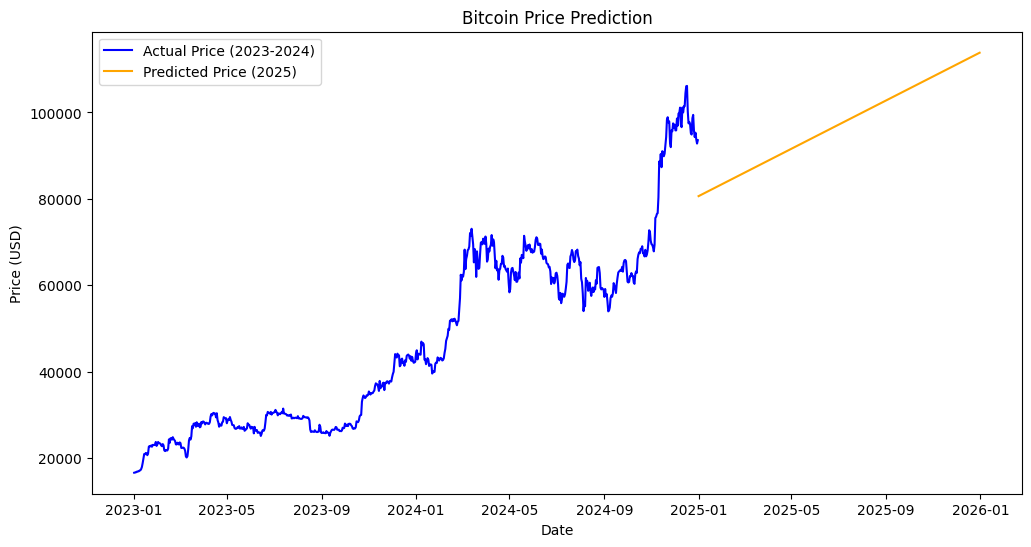

In [39]:
if "bitcoin" not in cleaned_data:
    print("Данные для Bitcoin отсутствуют. Убедитесь, что предыдущие ячейки выполнены корректно.")
else:
    # Строим график
    plt.figure(figsize=(12, 6))
    plt.plot(btc_data["date"], btc_data["price"], label="Actual Price (2023-2024)", color="blue")
    plt.plot(dates_2025, forecast, label="Predicted Price (2025)", color="orange")
    plt.title("Bitcoin Price Prediction")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.savefig("btc_prediction.png")
    plt.show()

In [40]:
for coin in cleaned_data.keys():  # Используем cleaned_data.keys(), чтобы избежать KeyError
    cleaned_data[coin].to_json(f"{coin}_cleaned.json", orient="records")
    print(f"Сохранено в JSON для {coin}")

Сохранено в JSON для bitcoin
Сохранено в JSON для ethereum
Сохранено в JSON для binancecoin
Сохранено в JSON для ripple
Сохранено в JSON для cardano
Сохранено в JSON для solana
Сохранено в JSON для dogecoin
Сохранено в JSON для toncoin
Сохранено в JSON для shiba-inu


In [41]:
import os
print(os.getcwd())

C:\Users\user
